# Profitabilität schlecht ausgerichteter / verschatteter Anlagen.

Diffuse Strahlung macht mehr als die Hälfte der Solaren Einstrahlung auf eine Solaranlage aus. 
Somit bringen auch schlecht ausgerichtete oder teilverschattete Anlagen sinnvolle Erträge. Das soll hier beispielhaft dargelegt werden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Verschattung reduziert den Solarertrag. Ich rechne kurz Beispielhaft die Effekte von verschatteten Modulen, gegen optimal ausgerichtete Module. 

Zunächst gehen wir mal zu [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/) und berechnen uns für eine Beispielhafte 1kWp-Anlage irgendwo im östlichen Sachsen-Anhalt die zu erwarteten Erträge.

Mit optimaler Ausrichtung: Süd, 35Grad Azimuth ergibt sich ein Ertrag von: $ 1059.01 \frac{kWh}{Jahr}$

Mit schlechter Ausrichtung: Nord, 45Grad Azimuth ergibt sich ein Ertrag von $ 454.66 \frac{kWh}{Jahr}$

Der Eigenverbrauch wird auf etwa $ 80\% $ geschätzt.

Beim Strompreis werden $ 0.25 \frac{\texteuro}{kWh} $ und eine jährliche Steigerung von $ 1\% $ angenommen. Das ist extrem wenig und da sind deutliche Steigerungen zu erwarten sodass die hier ermittelten Werte eine Worst-Case-Rechnung sind.

In [2]:
E_BEST = 1059.01
E_WORST = 454.66
POWER_PRICE = 0.25
POWER_INTEREST = 0.01
INITIAL_COST = np.linspace(500,3000)

## Funktionen

Wir bauen uns zwei Funktionen, die uns gleich helfen, den ganz Bumms auszurechnen

In [3]:
def annual_profit(power_earned, power_price, ratio=0.8):
    return power_earned * ratio * power_price


In [4]:
def get_break_even(initial_cost, solar_yield, power_price, power_interest):
    n_years = 0
    cost = initial_cost
    while True:
        cost -= annual_profit(solar_yield, power_price*(1+power_interest)**n_years)
        if cost < 0:
            break
        n_years += 1
    return n_years
    

## Auswertung nach Anschaffungskosten

Plotten wir nun das ganze mal und zeigen uns, wie unrentabel ein schlecht ausgerichtete Anlage tatsächlich ist.

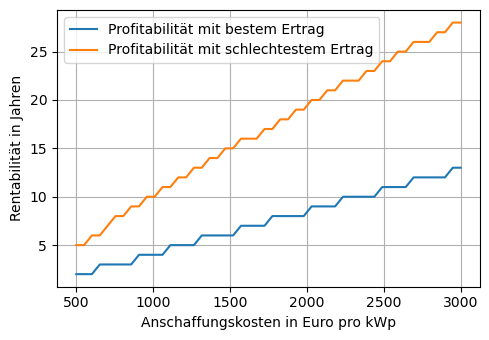

In [5]:
%matplotlib inline

x = INITIAL_COST
y_best = [ get_break_even(initial_cost, E_BEST, POWER_PRICE, POWER_INTEREST ) for initial_cost in x ]
y_worst = [ get_break_even(initial_cost, E_WORST, POWER_PRICE, POWER_INTEREST ) for initial_cost in x ]
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(x, y_best, label="Profitabilität mit bestem Ertrag")
ax.plot(x, y_worst, label="Profitabilität mit schlechtestem Ertrag")
ax.legend()
ax.grid()
ax.set_xlabel("Anschaffungskosten in Euro pro kWp")
ax.set_ylabel("Rentabilität in Jahren")
plt.tight_layout()

Wir sehen also, dass selbst bei extrem hohen Anschaffungskosten von $2000 \frac{\texteuro}{kWp}$ und schlechter Ausrichtung / Verschattung die Anlage schon nach ca. 16 Jahren rentabel ist. Im Best-case wäre dies allerdings schon nach etwa 8 Jahren der Fall. 

## Auswertung nach Ertrag

Wir schauen uns jetzt noch einmal an, welchen Solaren Ertrag wir benötigen, um nach 20 Jahren rentabel zu sein.

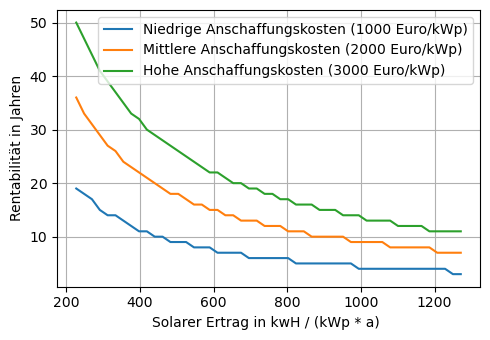

In [6]:
%matplotlib inline

low_initial_cost = 1000
medium_initial_cost = 2000
high_initial_cost = 3000
x = np.linspace (E_WORST / 2, E_BEST * 1.2)
y_low = [ get_break_even(low_initial_cost, e, POWER_PRICE, POWER_INTEREST) for e in x ]
y_medium = [ get_break_even(medium_initial_cost, e, POWER_PRICE, POWER_INTEREST) for e in x ]
y_high = [ get_break_even(high_initial_cost, e, POWER_PRICE, POWER_INTEREST) for e in x ]
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(x, y_low, label="Niedrige Anschaffungskosten (1000 Euro/kWp)")
ax.plot(x, y_medium, label="Mittlere Anschaffungskosten (2000 Euro/kWp)")
ax.plot(x, y_high, label="Hohe Anschaffungskosten (3000 Euro/kWp)")
ax.legend()
ax.grid()
ax.set_xlabel("Solarer Ertrag in kwH / (kWp * a) ")
ax.set_ylabel("Rentabilität in Jahren")
plt.tight_layout()

Wir sehen bei mittleren Anschaffungskosten einen Wert von etwa $450 \frac{\text{kWh}}{\text{kWp}*\text{a}}$.

## Auswirkungen auf Horizont

Diesen Ertrag kann man durch unverschattete Installation auf einem Norddach mit Neigungswinkel von 45 Grad erreichen.
Wir wollen jetzt aber mal schauen, wie groß der Kirchturm vor unserem perfekt ausgerichteten Süddach sein muss, um so einen schlechten Wert zu erzielen. 

Dafür erstellen wir eine Horizontdatei:


Jede Zeile steht für eine Himmelrichtung. Angefangen im Norden bei -180 Grad und hier in dem Fall dann in 20 Grad schritten. Genau im Süden versperrt uns ein riesiger Turm, der 120Grad breit ist die Sonne. 
Laut PVGIS erhalten wir aber immernoch einen Ertrag von: $662 \frac{\text{kWh}}{\text{kWp}*\text{a}}$. Und sind damit deutlich über den oben ermittelten Werten für Sinnhaftigkeit einer Installation. Also selbst bei Anschaffungskosten über $ 3000 \frac{\texteuro}{kWp}$ einer Amortisierung der Anschaffungskosten nach weniger als 20 Jahren.

Mit dem folgenden Horizontfile haben wir dann tatsächlich wieder den Ertrag von $450 \frac{\text{kWh}}{\text{kWp}*\text{a}}$

Das entspricht im Prinzip einem komplett verschatteten Süddach. 

In [7]:
import ipywidgets as widgets
from ipywidgets import Layout
style = {'description_width': 'initial'}

In [8]:
solarer_ertrag = widgets.IntSlider(
    description="Solarer Ertrag pro Jahr pro kWp: ", 
    value=500, 
    min=100, 
    max=1200,
    layout=Layout(width='500px', height='50px'),
    style=style
)
strompreis = widgets.FloatSlider(
    description="Strompreis: ", 
    value=0.25, 
    min=0.2, 
    max=0.5, 
    step=0.01,
    layout=Layout(width='500px', height='50px'),
    style=style
)
strompreissteigerung = widgets.FloatSlider(
    description="Strompreissteigerung: ", 
    value=0.01, 
    min=0.0, 
    max=0.1, 
    step=0.01,
    layout=Layout(width='500px', height='50px'),
    style=style
)
anschaffungskosten = widgets.IntSlider(
    description="Anschaffungskosten Euro/kWp: ", 
    value=1000,
    min=500,
    max=3000,
    layout=Layout(width='500px', height='50px'),
    style=style
)

result = widgets.FloatText(
    value=get_break_even(anschaffungskosten.value, solarer_ertrag.value, strompreis.value, strompreissteigerung.value),
    description='Amortisierung nach (Jahren):',
    disabled=True,
    layout=Layout(width='500px', height='50px'),
    style=style
)


def on_change(v):
    result.value = get_break_even(anschaffungskosten.value, solarer_ertrag.value, strompreis.value, strompreissteigerung.value)

solarer_ertrag.observe(on_change, names='value')
strompreis.observe(on_change, names='value')
strompreissteigerung.observe(on_change, names='value')
anschaffungskosten.observe(on_change, names='value')


display(solarer_ertrag)
display(strompreis)
display(strompreissteigerung)
display(anschaffungskosten)

display(result)

IntSlider(value=500, description='Solarer Ertrag pro Jahr pro kWp: ', layout=Layout(height='50px', width='500p…

FloatSlider(value=0.25, description='Strompreis: ', layout=Layout(height='50px', width='500px'), max=0.5, min=…

FloatSlider(value=0.01, description='Strompreissteigerung: ', layout=Layout(height='50px', width='500px'), max…

IntSlider(value=1000, description='Anschaffungskosten Euro/kWp: ', layout=Layout(height='50px', width='500px')…

FloatText(value=9.0, description='Amortisierung nach (Jahren):', disabled=True, layout=Layout(height='50px', w…